In [1]:
import pandas as pd
from datetime import datetime
import processes as ps #see processes.py

date="2018-11-18"
filename =date+"+bikes.csv"

df = pd.read_csv(filename, encoding='utf-8', sep=',', engine="python",)
print("File read")

File read


In [2]:
routes = ps.transform(df) #Reads the Dataframe, calculates the Routes on Map and returns a Dictionary with Routeinfos
print(routes[0])

{'bikeid': 22212, 'date': '2018-11-18', 'starttime': Timestamp('2018-11-18 01:50:01'), 'endtime': Timestamp('2018-11-18 02:10:01'), 'startlng': 7.011949462721501, 'startlat': 50.957410536847, 'endlng': 6.999732132999999, 'endlat': 50.96204705, 'route': [310245281, 585148, 104044765, 268188339, 259567297, 143386703, 143384330, 143496712, 143403322, 1715199879, 1863107996, 585156, 1670775121, 1670775149, 1670775182, 337962043, 337962054, 337962059, 442658, 259565937, 337962034, 259565819, 143419158, 143417267, 143417269, 1597902135, 258341690, 259565274, 794209042, 87751535, 583036648, 87748569], 'streetlist': ['Montanusstraße', 'Frankfurter Straße', 'Genovevastraße', 'Clevischer Ring', 'Julius-Bau-Straße', 'Adamsstraße', 'Buchheimer Straße', 'Biegerstraße', 'Bachstraße']}


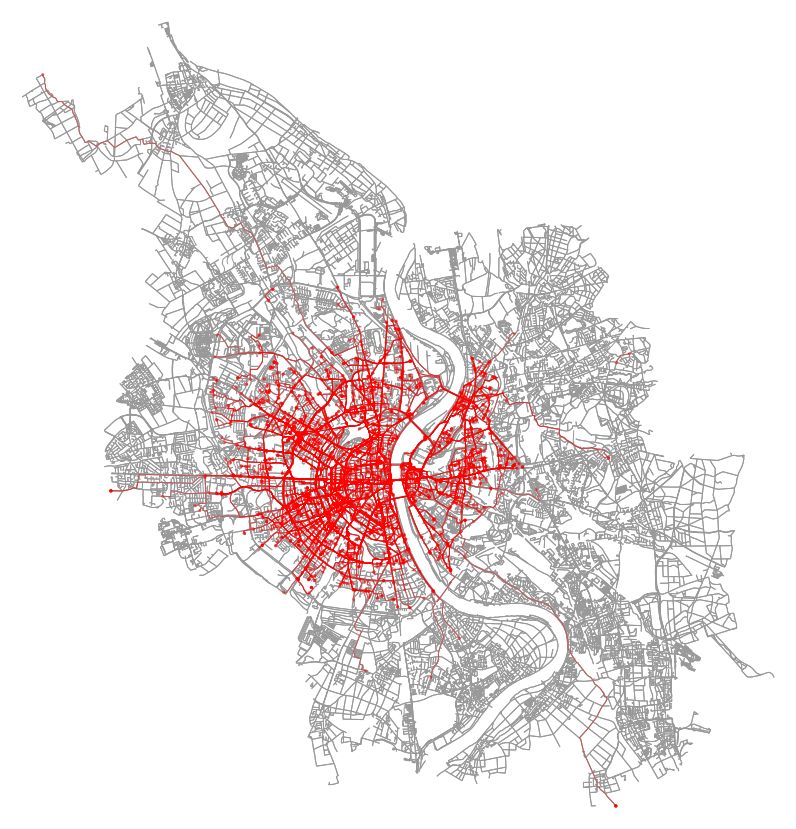

In [3]:
ps.pltfromdoc(routes) #Reads the Dictionary and plots the Routemap and saves it as png into the folder images

In [4]:
ps.heatfromdoc(routes) #Reads the Dictionary, calculates the Timeseries and plots the Heatmap and saves it to index.html
#see index.html

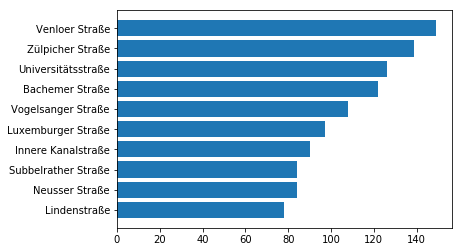

In [5]:
ps.pltStreetCount(routes) #plots Streetcount

In [7]:
#lets send the routes to MongoDB for later clustering and analysis with more data from other days 
from pymongo import MongoClient
hostip="XXX.XXX.XXX.XX"
cl = MongoClient(hostip, 27017)
db= cl.KVB
db.bikeroutes.delete_many({"date": {"$regex": ".*"+date+".*"}})


import numpy
for route in routes:
    for key in route:
            if isinstance(route[key], numpy.int64): route[key] = int(route[key])
    db.bikeroutes.insert_one(route)
